# Why Oklahoma Shakes

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('AIu3b0WhMgs', width=800, height=600)

In [2]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import requests
import pandas as pd
import numpy as np
import os
import glob
from IPython.core.display import HTML
from IPython.display import HTML
import reverse_geocoder as rg

#Oklahoma Latitude and Longitude Limits
minlatitude = 33.863,
maxlatitude = 37.004,
minlongitude = -99.976,
maxlongitude = -94.559

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
payload = {
    "format" : "geojson",
    "minlatitude" : minlatitude,
    "maxlatitude" : maxlatitude,
    "minlongitude" : minlongitude,
    "maxlongitude" : maxlongitude,
    "starttime" : "2013-01-01",
    "endtime" : "2018-12-31",
    "minmagnitude" : 2
    
}

In [3]:
# List out the files needed using the glob module
excel_data = glob.glob("Injection_Volumes_Data/*.xlsx")
excel_data

['Injection_Volumes_Data/2015UICvolumes.xlsx',
 'Injection_Volumes_Data/2013UICvolumes.xlsx',
 'Injection_Volumes_Data/2014UICvolumes.xlsx',
 'Injection_Volumes_Data/2016UICvolumes.xlsx',
 'Injection_Volumes_Data/2018UICvolumes.xlsx',
 'Injection_Volumes_Data/2017UICvolumes.xlsx']

In [4]:
# Import all the files and combine them into one dataframe
all_data_df = pd.DataFrame()
for f in excel_data:
    df = pd.read_excel(f)
    all_data_df = all_data_df.append(df,ignore_index=True, sort=False)

In [5]:
all_data_df

,API,OperatorName,WellName,WellNumber,Lat_Y,Long_X,CountyName,ReportYear,TotalDepth,Jan Vol,...,Mar Vol,Apr Vol,May Vol,Jun Vol,Jul Vol,Aug Vol,Sep Vol,Oct Vol,Nov Vol,Dec Vol
0,3500300026,PHOENIX PETROCORP INC,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,ALFALFA,2015,5012.0,465.0,...,465.0,450.0,465.0,450.0,465.0,465.0,450.0,465.0,411.0,404.0
1,3500300163,CHAMPLIN EXPLORATION INC,CHRISTENSEN,1,36.896636,-98.17772,ALFALFA,2015,5060.0,1063.0,...,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,1063.0,992.0
2,3500320145,CONTINENTAL RESOURCES INC,SINGREE,1,36.504849,-98.43324,ALFALFA,2015,6700.0,4804.0,...,3789.0,3444.0,360.0,1460.0,1342.0,1586.0,1546.0,300.0,0.0,0.0
3,3500320145,CONTINENTAL RESOURCES INC,SINGREE,1,36.504849,-98.43324,ALFALFA,2015,6700.0,4804.0,...,3789.0,3444.0,360.0,1460.0,1342.0,1586.0,1546.0,300.0,0.0,0.0
4,3500320786,LINN OPERATING LLC,NE CHEROKEE UNIT,85,36.806113,-98.32584,ALFALFA,2015,5247.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70552,35153235940000,SANDRIDGE EXPLORATION & PRODUCTION LLC,GARVIE SWD,1,0.000000,0.00000,WOODWARD,2017,5300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70553,35153235940000,SANDRIDGE EXPLORATION & PRODUCTION LLC,GARVIE SWD,1,0.000000,0.00000,WOODWARD,2017,5300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70554,35153235940000,SANDRIDGE EXPLORATION & PRODUCTION LLC,GARVIE SWD,1,0.000000,0.00000,WOODWARD,2017,5300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70555,35153235940000,SANDRIDGE EXPLORATION & PRODUCTION LLC,GARVIE SWD,1,0.000000,0.00000,WOODWARD,2017,5300.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Get total volumes per month per WellName
total_volume_per_month = all_data_df.groupby(["WellName", "Lat_Y", "Long_X", "CountyName", "TotalDepth", "ReportYear"])["Jan Vol", "Feb Vol", "Mar Vol", 
                                                           "Apr Vol", "May Vol", "Jun Vol", 
                                                           "Jul Vol", "Aug Vol", "Sep Vol", 
                                                           "Oct Vol", "Nov Vol", "Dec Vol"].sum()

<ipython-input-6-902a7107583b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_volume_per_month = all_data_df.groupby(["WellName", "Lat_Y", "Long_X", "CountyName", "TotalDepth", "ReportYear"])["Jan Vol", "Feb Vol", "Mar Vol",


In [7]:
total_volume_per_month

Jan Vol  \
WellName                    Lat_Y     Long_X     CountyName TotalDepth ReportYear            
 CALDWELL-LIONEL HARRIS     36.074014 -96.766570 PAYNE      3920.0     2013         1500.0   
                                                                       2014         1500.0   
                                                                       2015         1500.0   
                                                                       2016          960.0   
 MARTHA HOLATHA  AKA WACOHO 35.990140 -96.024770 TULSA      0.0        2013         1349.0   
...                                                                                    ...   
ZOMA TANNER                 36.771194 -95.552583 NOWATA     696.0      2014         1581.0   
                                                                       2015         1760.0   
                                                                       2016         1610.0   
                                                                       2017         1593.0   
                                                                       2018         1512.0   

                                                                                   Feb Vol  \
WellName                    Lat_Y     Long_X     CountyName TotalDepth ReportYear            
 CALDWELL-LIONEL HARRIS     36.074014 -96.766570 PAYNE      3920.0     2013         1500.0   
                                                                       2014         1500.0   
                                                                       2015         1500.0   
                                                                       2016          960.0   
 MARTHA HOLATHA  AKA WACOHO 35.990140 -96.024770 TULSA      0.0        2013         1216.0   
...                                                                                    ...   
ZOMA TANNER                 36.771194 -95.552583 NOWATA     696.0      2014         1764.0   
                                                                       2015         1382.0   
                                                                       2016         1479.0   
                                                                       2017         1410.0   
                                                                       2018            0.0   

                                                                                   Mar Vol  \
WellName                    Lat_Y     Long_X     CountyName TotalDepth ReportYear            
 CALDWELL-LIONEL HARRIS     36.074014 -96.766570 PAYNE      3920.0     2013         1500.0   
                                                                       2014         1500.0   
                                                                       2015         1500.0   
                                                                       2016          960.0   
 MARTHA HOLATHA  AKA WACOHO 35.990140 -96.024770 TULSA      0.0        2013         1329.0   
...                                                                                    ...   
ZOMA TANNER                 36.771194 -95.552583 NOWATA     696.0      2014         1489.0   
                                                                       2015         1987.0   
                                                                       2016         1632.0   
                                                                       2017         1431.0   
                                                                       2018         1643.0   

                                                                                   Apr Vol  \
WellName                    Lat_Y     Long_X     CountyName TotalDepth ReportYear            
 CALDWELL-LIONEL HARRIS     36.074014 -96.766570 PAYNE      3920.0     2013         1500.0   
                                                                       2014         1500.0   
                                      

In [8]:
# Convert to dataframe 
total_volume_per_month_df = pd.DataFrame(total_volume_per_month).reset_index()
total_volume_per_month_df

,WellName,Lat_Y,Long_X,CountyName,TotalDepth,ReportYear,Jan Vol,Feb Vol,Mar Vol,Apr Vol,May Vol,Jun Vol,Jul Vol,Aug Vol,Sep Vol,Oct Vol,Nov Vol,Dec Vol
0,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2013,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
1,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2014,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
2,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2015,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
3,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2016,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0
4,MARTHA HOLATHA AKA WACOHO,35.990140,-96.024770,TULSA,0.0,2013,1349.0,1216.0,1329.0,1192.0,1299.0,1365.0,1389.0,1341.0,1250.0,1577.0,1303.0,1284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58891,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2014,1581.0,1764.0,1489.0,1701.0,1981.0,1631.0,1499.0,1893.0,1510.0,1601.0,1415.0,1839.0
58892,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2015,1760.0,1382.0,1987.0,1979.0,1602.0,1897.0,1767.0,1510.0,1493.0,1601.0,1431.0,1397.0
58893,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2016,1610.0,1479.0,1632.0,1735.0,1469.0,1421.0,1492.0,1374.0,0.0,1401.0,1473.0,1632.0
58894,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2017,1593.0,1410.0,1431.0,1410.0,1518.0,1431.0,1493.0,1431.0,1620.0,1823.0,923.0,1632.0


In [9]:
# Delete data with zero volume (pick non-zero values which turns all zero values into nan and remove nan-values)
clean_total_volume_per_month_df = total_volume_per_month_df[total_volume_per_month_df!=0].dropna()

In [10]:
clean_total_volume_per_month_df

,WellName,Lat_Y,Long_X,CountyName,TotalDepth,ReportYear,Jan Vol,Feb Vol,Mar Vol,Apr Vol,May Vol,Jun Vol,Jul Vol,Aug Vol,Sep Vol,Oct Vol,Nov Vol,Dec Vol
0,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2013,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
1,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2014,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
2,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2015,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
3,CALDWELL-LIONEL HARRIS,36.074014,-96.766570,PAYNE,3920.0,2016,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0
29,(TDU) CD,34.509226,-97.533300,GARVIN,2866.0,2013,23357.0,27410.0,31970.0,30890.0,30271.0,29169.0,31720.0,28963.0,22239.0,24269.0,24379.0,23565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58885,ZOMA TANNER,36.769111,-95.551333,NOWATA,697.0,2014,9989.0,8631.0,8241.0,10762.0,10404.0,13732.0,12640.0,12637.0,9927.0,11869.0,3665.0,12365.0
58890,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2013,1680.0,1710.0,2101.0,2091.0,2231.0,1503.0,1581.0,1981.0,2131.0,1510.0,1733.0,1831.0
58891,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2014,1581.0,1764.0,1489.0,1701.0,1981.0,1631.0,1499.0,1893.0,1510.0,1601.0,1415.0,1839.0
58892,ZOMA TANNER,36.771194,-95.552583,NOWATA,696.0,2015,1760.0,1382.0,1987.0,1979.0,1602.0,1897.0,1767.0,1510.0,1493.0,1601.0,1431.0,1397.0


In [11]:
# Get total volumes per year

volume_per_month = clean_total_volume_per_month_df.pivot_table(values=["Jan Vol", "Feb Vol", "Mar Vol", "Apr Vol", 
                                                                       "May Vol", "Jun Vol", "Jul Vol", "Aug Vol",
                                                                       "Sep Vol", "Oct Vol", "Nov Vol", "Dec Vol"], index=["WellName","ReportYear"], aggfunc='sum')
volume_per_month

Apr Vol  Aug Vol  Dec Vol  Feb Vol  \
WellName                ReportYear                                       
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0   
                        2014         1500.0   1500.0   1500.0   1500.0   
                        2015         1500.0   1500.0   1500.0   1500.0   
                        2016          960.0    960.0    960.0    960.0   
(TDU) CD                2013        30890.0  28963.0  23565.0  27410.0   
...                                     ...      ...      ...      ...   
ZOLLAR                  2017        10937.0   8421.0   1016.0  11131.0   
ZOMA TANNER             2013        23144.0  24310.0  15980.0  17838.0   
                        2014        19270.0  22901.0  22532.0  16784.0   
                        2015         9589.0  10449.0   8779.0   7769.0   
                        2017         1410.0   1431.0   1632.0   1410.0   

                                    Jan Vol  Jul Vol  Jun Vol  Mar Vol  \
WellName                ReportYear                                       
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0   
                        2014         1500.0   1500.0   1500.0   1500.0   
                        2015         1500.0   1500.0   1500.0   1500.0   
                        2016          960.0    960.0    960.0    960.0   
(TDU) CD                2013        23357.0  31720.0  29169.0  31970.0   
...                                     ...      ...      ...      ...   
ZOLLAR                  2017        10265.0  10421.0   9376.0   9284.0   
ZOMA TANNER             2013        21600.0  22754.0  23144.0  23367.0   
                        2014        18793.0  24017.0  23270.0  15739.0   
                        2015        10673.0  11077.0   6811.0   9188.0   
                        2017         1593.0   1493.0   1431.0   1431.0   

                                    May Vol  Nov Vol  Oct Vol  Sep Vol  
WellName                ReportYear                                      
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0  
                        2014         1500.0   1500.0   1500.0   1500.0  
                        2015         1500.0   1500.0   1500.0   1500.0  
                        2016          960.0    960.0    960.0    960.0  
(TDU) CD                2013        30271.0  24379.0  24269.0  22239.0  
...                                     ...      ...      ...      ...  
ZOLLAR                  2017         8767.0   3924.0   3561.0   7634.0  
ZOMA TANNER             2013        26623.0  16493.0  21094.0  21062.0  
                        2014        18954.0  15456.0  20821.0  18097.0  
                        2015        12255.0   8669.0   8604.0  10064.0  
                        2017         1518.0    923.0   1823.0   1620.0  

[22981 rows x 12 columns]

In [12]:
# Get total volumes per month and add column in the data frame
col_list = list(volume_per_month)
volume_per_month['Total Vol'] = volume_per_month[col_list].sum(axis=1)
volume_per_month


Apr Vol  Aug Vol  Dec Vol  Feb Vol  \
WellName                ReportYear                                       
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0   
                        2014         1500.0   1500.0   1500.0   1500.0   
                        2015         1500.0   1500.0   1500.0   1500.0   
                        2016          960.0    960.0    960.0    960.0   
(TDU) CD                2013        30890.0  28963.0  23565.0  27410.0   
...                                     ...      ...      ...      ...   
ZOLLAR                  2017        10937.0   8421.0   1016.0  11131.0   
ZOMA TANNER             2013        23144.0  24310.0  15980.0  17838.0   
                        2014        19270.0  22901.0  22532.0  16784.0   
                        2015         9589.0  10449.0   8779.0   7769.0   
                        2017         1410.0   1431.0   1632.0   1410.0   

                                    Jan Vol  Jul Vol  Jun Vol  Mar Vol  \
WellName                ReportYear                                       
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0   
                        2014         1500.0   1500.0   1500.0   1500.0   
                        2015         1500.0   1500.0   1500.0   1500.0   
                        2016          960.0    960.0    960.0    960.0   
(TDU) CD                2013        23357.0  31720.0  29169.0  31970.0   
...                                     ...      ...      ...      ...   
ZOLLAR                  2017        10265.0  10421.0   9376.0   9284.0   
ZOMA TANNER             2013        21600.0  22754.0  23144.0  23367.0   
                        2014        18793.0  24017.0  23270.0  15739.0   
                        2015        10673.0  11077.0   6811.0   9188.0   
                        2017         1593.0   1493.0   1431.0   1431.0   

                                    May Vol  Nov Vol  Oct Vol  Sep Vol  \
WellName                ReportYear                                       
 CALDWELL-LIONEL HARRIS 2013         1500.0   1500.0   1500.0   1500.0   
                        2014         1500.0   1500.0   1500.0   1500.0   
                        2015         1500.0   1500.0   1500.0   1500.0   
                        2016          960.0    960.0    960.0    960.0   
(TDU) CD                2013        30271.0  24379.0  24269.0  22239.0   
...                                     ...      ...      ...      ...   
ZOLLAR                  2017         8767.0   3924.0   3561.0   7634.0   
ZOMA TANNER             2013        26623.0  16493.0  21094.0  21062.0   
                        2014        18954.0  15456.0  20821.0  18097.0   
                        2015        12255.0   8669.0   8604.0  10064.0   
                        2017         1518.0    923.0   1823.0   1620.0   

                                    Total Vol  
WellName                ReportYear             
 CALDWELL-LIONEL HARRIS 2013          18000.0  
                        2014          18000.0  
                        2015          18000.0  
                        2016          11520.0  
(TDU) CD                2013         328202.0  
...                                       ...  
ZOLLAR                  2017          94737.0  
ZOMA TANNER             2013         257409.0  
                        2014         236634.0  
                        2015         113927.0  
                        2017          17715.0  

[22981 rows x 13 columns]

In [13]:
# Get location of injection wells
wells_location = clean_total_volume_per_month_df.pivot_table(values=["Lat_Y", "Long_X"], index=("WellName"))
wells_location

,Lat_Y,Long_X
WellName,,
CALDWELL-LIONEL HARRIS,36.074014,-96.766570
(TDU) CD,34.509226,-97.533300
(TDU) RI,34.508796,-97.527780
(TDU) SH,34.512399,-97.543700
/SUE RICHARDSON/EVELYN C,34.522590,-99.234210
...,...,...
ZIMMERMAN SWD (1A),35.904161,-98.434260
ZIPSIE,34.435691,-98.268090
ZOLDOSKE,36.421100,-97.364211


In [14]:
# Get number of wells in each county per WellName
county_wells_count = clean_total_volume_per_month_df.groupby(["WellName","CountyName"])["CountyName"].count()
county_wells_df = pd.DataFrame(county_wells_count)
county_wells_df.columns = ["NumberofWells"]
county_wells_df.reset_index()

,WellName,CountyName,NumberofWells
0,CALDWELL-LIONEL HARRIS,PAYNE,4
1,(TDU) CD,GARVIN,6
2,(TDU) RI,GARVIN,6
3,(TDU) SH,GARVIN,6
4,/SUE RICHARDSON/EVELYN C,JACKSON,3
...,...,...,...
6746,ZIMMERMAN SWD (1A),BLAINE,1
6747,ZIPSIE,COTTON,6
6748,ZOLDOSKE,NOBLE,2
6749,ZOLLAR,LINCOLN,5


In [15]:
# Get total wells per county
total_wells_per_county = pd.DataFrame(county_wells_df.groupby(["CountyName"])['NumberofWells'].count()).reset_index()
total_wells_per_county_sorted = total_wells_per_county.sort_values('NumberofWells')
total_wells_per_county_sorted

,CountyName,NumberofWells
23,HARMON,1
39,MAYES,2
33,LEFLORE,2
13,CRAIG,2
22,GREER,2
...,...,...
56,SEMINOLE,363
52,PONTOTOC,419
14,CREEK,546
57,STEPHENS,661


In [16]:
# List out the earthquake files needed
OK_EQ_data = glob.glob("Oklahoma_earthquakes/*.xlsx")
OK_EQ_data

['Oklahoma_earthquakes/2017.xlsx',
 'Oklahoma_earthquakes/2016.xlsx',
 'Oklahoma_earthquakes/2013.xlsx',
 'Oklahoma_earthquakes/2015.xlsx',
 'Oklahoma_earthquakes/2014.xlsx',
 'Oklahoma_earthquakes/2018.xlsx']

In [17]:
# Import all the files and combine them into one dataframe
all_EQ_data_df = pd.DataFrame()
for f in OK_EQ_data:
    eq_df = pd.read_excel (f)
    all_EQ_data_df = all_EQ_data_df.append(eq_df,ignore_index=True, sort=False)

In [18]:
# Convert county names to all uppercase for uniformity
all_EQ_data_df["county"] = all_EQ_data_df["county"].str.upper()

In [19]:
# Extract all earthquakes that have a magnitude of 2.5 or higher
new_all_EQ_data_df = all_EQ_data_df[all_EQ_data_df["prefmag"] >= 2.5]
new_all_EQ_data_df

,id,origintime,latitude,longitude,depth,county,prefmag
0,27287,2017-01-01 02:29:41.796,35.254220,-97.769450,4.194,GRADY,2.6
1,27285,2017-01-01 06:43:01.465,36.285580,-97.501690,4.179,GARFIELD,3.0
2,27278,2017-01-02 15:25:35.006,36.396780,-96.885870,4.152,PAWNEE,3.3
3,27277,2017-01-02 15:28:40.169,36.396130,-96.885830,4.241,PAWNEE,3.4
6,26884,2017-01-02 17:29:45.384,36.125840,-96.874240,4.069,PAYNE,2.7
...,...,...,...,...,...,...,...
27449,4102,2018-12-30 08:28:18.000,36.444333,-96.876167,5.360,PAWNEE,2.6
27450,4395,2018-12-30 08:50:33.000,36.391667,-98.380833,6.280,MAJOR,2.6
27453,4074,2018-12-30 10:46:54.000,36.393753,-98.370880,3.490,MAJOR,2.9
27457,4169,2018-12-31 07:22:29.000,35.941667,-96.728667,6.040,PAYNE,2.6


In [20]:
# Get total number of earthquakes per county
county_EQ_count = new_all_EQ_data_df.groupby(["county"])["prefmag"].count()
county_EQ_count_df = pd.DataFrame(county_EQ_count)
county_EQ_count_df.columns = ["NumberofEQ"]
county_EQ_count_df.reset_index()
total_EQ_per_county_sorted = county_EQ_count_df.sort_values('NumberofEQ', ascending=False).reset_index()
total_EQ_per_county_sorted

,county,NumberofEQ
0,GRANT,1866
1,LOGAN,1237
2,GARFIELD,803
3,ALFALFA,791
4,NOBLE,710
5,WOODS,701
6,PAYNE,683
7,OKLAHOMA,631
8,WOODWARD,403
9,PAWNEE,399


In [21]:
# Create dataframe for wells vs. earthquakes
wells_EQ_data = pd.merge(total_wells_per_county_sorted, total_EQ_per_county_sorted, how = "left", left_on = "CountyName", right_on = "county")

wells_EQ_data= wells_EQ_data.drop(["county"], axis=1)
wells_EQ_data["NumberofEQ"] = wells_EQ_data["NumberofEQ"].fillna(0.0).astype(int)
wells_EQ_data.sort_values("NumberofWells")
wells_EQ_data

,CountyName,NumberofWells,NumberofEQ
0,HARMON,1,0
1,MAYES,2,0
2,LEFLORE,2,0
3,CRAIG,2,0
4,GREER,2,0
...,...,...,...
61,SEMINOLE,363,35
62,PONTOTOC,419,2
63,CREEK,546,1
64,STEPHENS,661,18


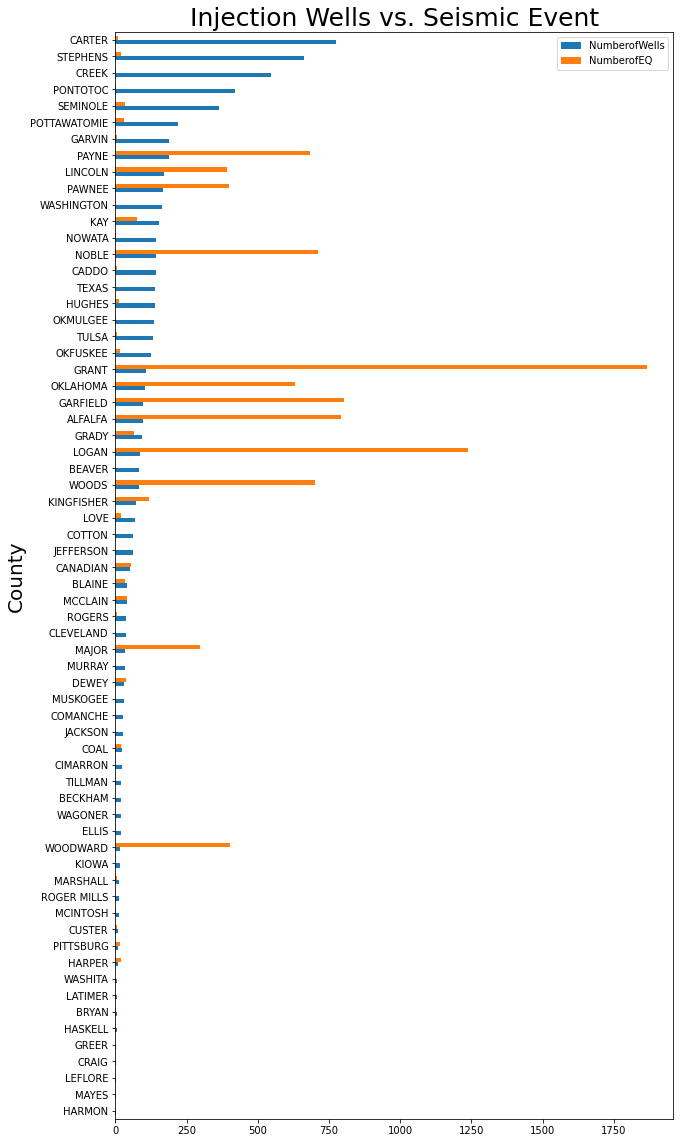

In [22]:
# Plot the data
wells_EQ_data.plot(x='CountyName', kind = 'barh')
plt.title("Injection Wells vs. Seismic Event", fontsize = 25)
plt.ylabel("County", fontsize = 20)
plt.gcf().set_size_inches((10, 20))
plt.style.use("ggplot")
plt.savefig('Wells_vs_Earthquakes.png', dpi=300)

In [23]:
#Using the USGS API to get seismic events in Oklahoma
new = requests.get(url, payload)
USGS_data = new.json()
USGS_data

{'type': 'FeatureCollection',
 'metadata': {'generated': 1579142499000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude=33.863&maxlatitude=37.004&minlongitude=-99.976&maxlongitude=-94.559&starttime=2013-01-01&endtime=2018-12-31&minmagnitude=2',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.8.1',
  'count': 9371},
 'features': [{'type': 'Feature',
   'properties': {'mag': 2.2,
    'place': '15km NE of Fairview, Oklahoma',
    'time': 1546166814510,
    'updated': 1551807999040,
    'tz': -360,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000iz6u',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us2000iz6u&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 74,
    'net': 'us',
    'code': '2000iz6u',
    'ids': ',us2000iz6u,',
    'sources': ',us,',
    'types': ',geoserve,origin,phase-data,',
    'nst'

In [24]:
mag,coord,time,magType,place,ID = [],[],[],[],[],[]
for result in USGS_data['features']:
    mag.append(result[u'properties'][u'mag'])
    coord.append(result[u'geometry'][u'coordinates'])
    time.append(result[u'properties'][u'time'])
    magType.append(result[u'properties'][u'magType'])
    place.append(result[u'properties'][u'place'])
    ID.append(result[u'id'])

In [25]:
quake_df = pd.DataFrame([ID,time,mag,coord,magType,place]).transpose()
eq_df  = quake_df.rename(columns={0: "ID", 1: "Time", 2: "Mag",3: "LatLong", 4: "Mag Type", 5: "Location"})
eq_final_df = eq_df.drop_duplicates(['ID'])
lat = eq_final_df["LatLong"].apply(lambda l: l[0])
long = eq_final_df["LatLong"].apply(lambda l: l[1])
eq_final_df

,ID,Time,Mag,LatLong,Mag Type,Location
0,us2000iz6u,1546166814510,2.2,"[-98.3804, 36.3818, 6.01]",mb_lg,"15km NE of Fairview, Oklahoma"
1,us2000iz51,1546159833730,2,"[-98.3808, 36.3917, 6.28]",mb_lg,"16km NNE of Fairview, Oklahoma"
2,us2000iz4w,1546158498840,2.2,"[-96.8762, 36.4443, 5.36]",ml,"13km NNW of Pawnee, Oklahoma"
3,us2000iyvs,1546073324730,2.5,"[-97.3898, 35.6547, 5]",mb_lg,"7km E of Edmond, Oklahoma"
4,us2000iyvq,1546073222930,2.2,"[-97.399, 35.6747, 7.42]",mb_lg,"7km ENE of Edmond, Oklahoma"
...,...,...,...,...,...,...
9366,usp000jyfr,1358317595270,3.2,"[-97.337, 35.619, 5]",mblg,Oklahoma
9367,usp000jy6v,1357837556890,2.3,"[-97.23, 35.613, 3.7]",ml,Oklahoma
9368,usp000jy2z,1357687116000,2.9,"[-97.275, 35.454, 3]",ml,Oklahoma
9369,usp000jxsv,1357264760000,3.5,"[-96.515, 35.38, 5]",mwr,Oklahoma


In [26]:
lat = pd.DataFrame(eq_final_df["LatLong"].apply(lambda l: l[1])).rename(columns ={"LatLong":"Lat"})
long = pd.DataFrame(eq_final_df["LatLong"].apply(lambda l: l[0])).rename(columns ={"LatLong":"Long"})
eqDF = eq_final_df.join(lat).join(long)
eqFinalDF = eqDF.drop(['LatLong'], axis = 1)
eqFinalDF

,ID,Time,Mag,Mag Type,Location,Lat,Long
0,us2000iz6u,1546166814510,2.2,mb_lg,"15km NE of Fairview, Oklahoma",36.3818,-98.3804
1,us2000iz51,1546159833730,2,mb_lg,"16km NNE of Fairview, Oklahoma",36.3917,-98.3808
2,us2000iz4w,1546158498840,2.2,ml,"13km NNW of Pawnee, Oklahoma",36.4443,-96.8762
3,us2000iyvs,1546073324730,2.5,mb_lg,"7km E of Edmond, Oklahoma",35.6547,-97.3898
4,us2000iyvq,1546073222930,2.2,mb_lg,"7km ENE of Edmond, Oklahoma",35.6747,-97.3990
...,...,...,...,...,...,...,...
9366,usp000jyfr,1358317595270,3.2,mblg,Oklahoma,35.6190,-97.3370
9367,usp000jy6v,1357837556890,2.3,ml,Oklahoma,35.6130,-97.2300
9368,usp000jy2z,1357687116000,2.9,ml,Oklahoma,35.4540,-97.2750
9369,usp000jxsv,1357264760000,3.5,mwr,Oklahoma,35.3800,-96.5150


In [27]:
eqFinalDF_time = pd.DataFrame(pd.to_datetime(eqFinalDF['Time'], unit = "ms"))
eqFinal = eqFinalDF_time.rename(columns = {"Time":"New Time"})
eqFinal['year'] = pd.DatetimeIndex(eqFinal['New Time']).year
eqFinalDF['Time'] = eqFinal['year']
eqFinalDF

,ID,Time,Mag,Mag Type,Location,Lat,Long
0,us2000iz6u,2018,2.2,mb_lg,"15km NE of Fairview, Oklahoma",36.3818,-98.3804
1,us2000iz51,2018,2,mb_lg,"16km NNE of Fairview, Oklahoma",36.3917,-98.3808
2,us2000iz4w,2018,2.2,ml,"13km NNW of Pawnee, Oklahoma",36.4443,-96.8762
3,us2000iyvs,2018,2.5,mb_lg,"7km E of Edmond, Oklahoma",35.6547,-97.3898
4,us2000iyvq,2018,2.2,mb_lg,"7km ENE of Edmond, Oklahoma",35.6747,-97.3990
...,...,...,...,...,...,...,...
9366,usp000jyfr,2013,3.2,mblg,Oklahoma,35.6190,-97.3370
9367,usp000jy6v,2013,2.3,ml,Oklahoma,35.6130,-97.2300
9368,usp000jy2z,2013,2.9,ml,Oklahoma,35.4540,-97.2750
9369,usp000jxsv,2013,3.5,mwr,Oklahoma,35.3800,-96.5150


In [28]:
# Isolate the location information using a reverse geocoding module
subset = eqFinalDF[['Lat', 'Long']]
tuples = [tuple(x) for x in subset.to_numpy()]
def reversegeo(coordinates):
    county_result = rg.search(coordinates)
    county_result = [dict(d) for d in county_result]
    return county_result
coordinates = (tuples)
l = reversegeo(coordinates)
l

Loading formatted geocoded file...


[{'lat': '36.26892',
  'lon': '-98.4798',
  'name': 'Fairview',
  'admin1': 'Oklahoma',
  'admin2': 'Major County',
  'cc': 'US'},
 {'lat': '36.26892',
  'lon': '-98.4798',
  'name': 'Fairview',
  'admin1': 'Oklahoma',
  'admin2': 'Major County',
  'cc': 'US'},
 {'lat': '36.33783',
  'lon': '-96.80392',
  'name': 'Pawnee',
  'admin1': 'Oklahoma',
  'admin2': 'Pawnee County',
  'cc': 'US'},
 {'lat': '35.65283',
  'lon': '-97.4781',
  'name': 'Edmond',
  'admin1': 'Oklahoma',
  'admin2': 'Oklahoma County',
  'cc': 'US'},
 {'lat': '35.65283',
  'lon': '-97.4781',
  'name': 'Edmond',
  'admin1': 'Oklahoma',
  'admin2': 'Oklahoma County',
  'cc': 'US'},
 {'lat': '36.1092',
  'lon': '-97.89867',
  'name': 'Hennessey',
  'admin1': 'Oklahoma',
  'admin2': 'Kingfisher County',
  'cc': 'US'},
 {'lat': '36.26892',
  'lon': '-98.4798',
  'name': 'Fairview',
  'admin1': 'Oklahoma',
  'admin2': 'Major County',
  'cc': 'US'},
 {'lat': '36.28949',
  'lon': '-97.2881',
  'name': 'Perry',
  'admin1': 'O

In [29]:
# Extract the county name out of the dictionary from the reverse geocoding workflow and place it in a 
#column associated with each seismic event
testDF = pd.DataFrame(l)
countyDF = testDF.rename(columns={"admin2":"County", "admin1":"State","name":"City"})
County_it1 = countyDF.County.apply(lambda x:pd.Series(str(x).split(" ")))
County_it2 = County_it1.rename(columns={0:"County",1:"Extra"})
County_it2.drop(["Extra"],axis=1)
eqFinalDF['County'] = County_it2['County']
eqFinalDF

,ID,Time,Mag,Mag Type,Location,Lat,Long,County
0,us2000iz6u,2018,2.2,mb_lg,"15km NE of Fairview, Oklahoma",36.3818,-98.3804,Major
1,us2000iz51,2018,2,mb_lg,"16km NNE of Fairview, Oklahoma",36.3917,-98.3808,Major
2,us2000iz4w,2018,2.2,ml,"13km NNW of Pawnee, Oklahoma",36.4443,-96.8762,Pawnee
3,us2000iyvs,2018,2.5,mb_lg,"7km E of Edmond, Oklahoma",35.6547,-97.3898,Oklahoma
4,us2000iyvq,2018,2.2,mb_lg,"7km ENE of Edmond, Oklahoma",35.6747,-97.3990,Oklahoma
...,...,...,...,...,...,...,...,...
9366,usp000jyfr,2013,3.2,mblg,Oklahoma,35.6190,-97.3370,Oklahoma
9367,usp000jy6v,2013,2.3,ml,Oklahoma,35.6130,-97.2300,Oklahoma
9368,usp000jy2z,2013,2.9,ml,Oklahoma,35.4540,-97.2750,Oklahoma
9369,usp000jxsv,2013,3.5,mwr,Oklahoma,35.3800,-96.5150,Okfuskee


In [30]:
# Extract just total volume per year for plotting
total_volume_per_year = pd.DataFrame(volume_per_month).reset_index().drop(["WellName", "Jan Vol", "Feb Vol", "Mar Vol", 
                                                                           "Apr Vol", "May Vol", "Jun Vol", "Jul Vol", 
                                                                           "Aug Vol", "Sep Vol", "Oct Vol", "Nov Vol",
                                                                           "Dec Vol"], axis=1)

total_volume_per_year = total_volume_per_year.groupby(['ReportYear'])['Total Vol'].sum().astype(int)
total_volume_per_year_df = pd.DataFrame(total_volume_per_year)
total_volume_per_year_df

,Total Vol
ReportYear,
2013,2171251375
2014,2519550156
2015,2515173045
2016,2217188211
2017,2298018472
2018,2409499511


In [31]:
total_EQ_per_year = eqFinalDF.groupby(['Time'])['County'].count()
total_EQ_per_year_df = pd.DataFrame(total_EQ_per_year)
total_EQ_per_year_df.columns = ["NumberofEQ"]
total_EQ_per_year_df["Total Vol"] = total_volume_per_year_df["Total Vol"]
total_EQ_per_year_df

,NumberofEQ,Total Vol
Time,,
2013,314,2171251375
2014,2022,2519550156
2015,2951,2515173045
2016,2268,2217188211
2017,1095,2298018472
2018,721,2409499511


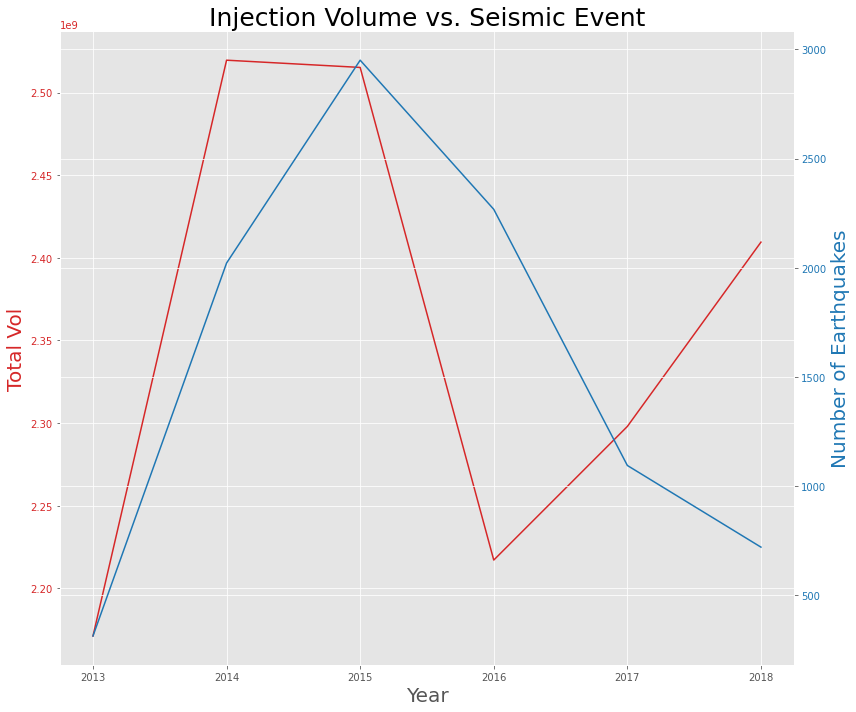

In [32]:
# Plots with different scales

x_values = total_EQ_per_year_df.index
y_values = total_EQ_per_year_df["Total Vol"]
z_values = total_EQ_per_year_df["NumberofEQ"]

fig, ax1 = plt.subplots()
plt.gcf().set_size_inches((12, 10))
plt.title("Injection Volume vs. Seismic Event", fontsize = 25)

color = 'tab:red'
ax1.set_xlabel('Year', fontsize = 20)
ax1.set_ylabel('Total Vol', color=color, fontsize = 20)
ax1.plot(x_values, y_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of Earthquakes', color=color, fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(x_values, z_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.style.use("ggplot")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Volume_vs_EQevent.png', dpi=300)
plt.show()

In [33]:
#This block of code extracts the county name out of the dictionary from the reverse geocoding workflow 
#and places it in a column associated with each seismic event
testDF = pd.DataFrame(l)
countyDF = testDF.rename(columns={"admin2":"County", "admin1":"State","name":"City"})
County_it1 = countyDF.County.apply(lambda x:pd.Series(str(x).split(" ")))
County_it2 = County_it1.rename(columns={0:"County",1:"Extra"})
County_it2.drop(["Extra"],axis=1)
eqFinalDF['County'] = County_it2['County']
eqFinalDF['City'] = countyDF['City']
city_df = pd.DataFrame(eqFinalDF.groupby('City')['ID'].nunique())
cityDF = city_df.sort_values(by=['ID'], ascending = True)
cityDF

,ID
City,
Tecumseh,1
Mustang,1
Park Hill,1
Shawnee,1
Del City,1
...,...
Pawnee,477
Fairview,497
Cherokee,570


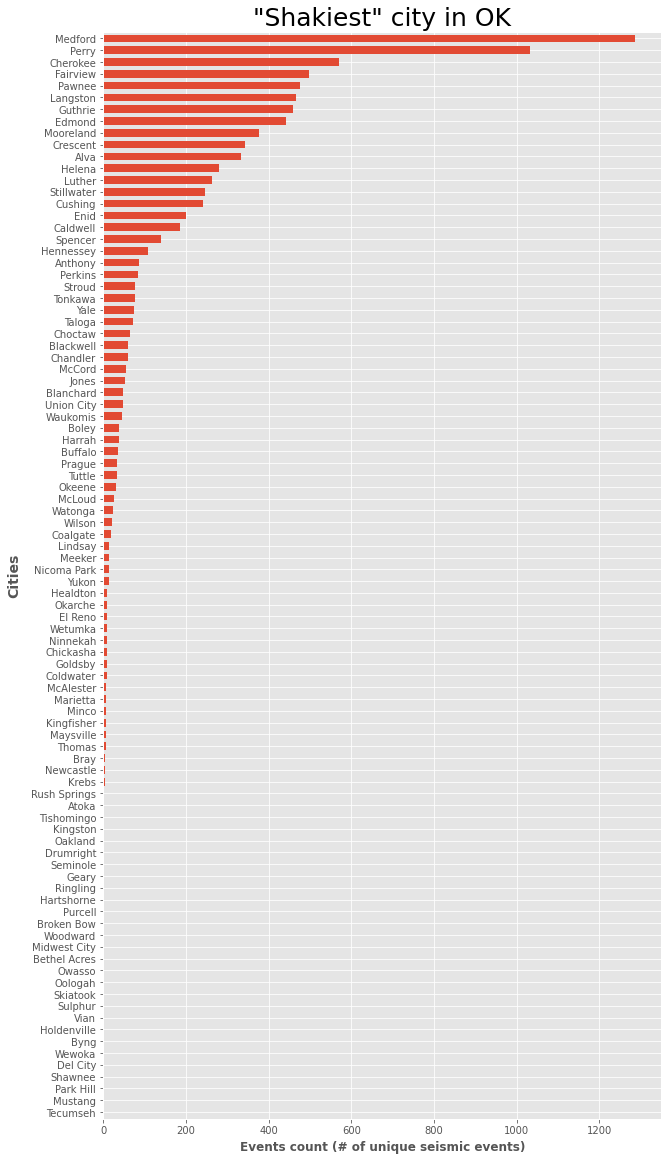

In [34]:
#Plot the data
ax = cityDF.plot(kind='barh', figsize=(10, 20), zorder=2, width=0.65, legend = False)
ax.set_title('"Shakiest" city in OK', fontsize = 25)
# Set x-axis label
ax.set_xlabel("Events count (# of unique seismic events)", labelpad=5, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("Cities", labelpad = 10,  weight='bold', size=14)
plt.savefig('ShakiestCity.png', dpi=300)
plt.show()

In [35]:
eqDF = eq_final_df.join(lat).join(long)
eqFinalDF = eqDF.drop(['LatLong'], axis = 1)
eqFinalDF
eqFinalPlotDF = eqFinalDF
ok_m = plt.imread("map_ok.png", format=None) 

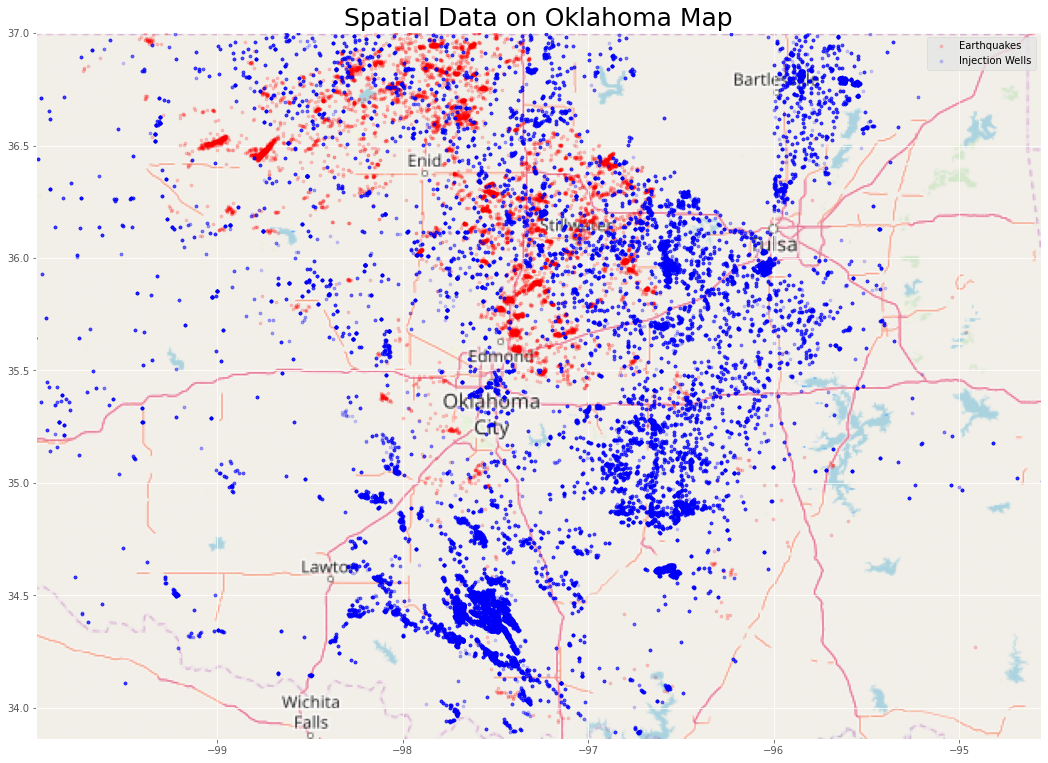

In [36]:
fig, ax = plt.subplots(figsize = (18, 13))
ax.scatter(eqFinalPlotDF.Long, eqFinalPlotDF.Lat, zorder=1, alpha= 0.2, c='r', s=10)
ax.scatter(all_data_df.Long_X, all_data_df.Lat_Y, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title("Spatial Data on Oklahoma Map", fontsize = 25)
ax.set_xlim(-99.976, -94.559)
ax.set_ylim(33.863, 37.004)
ax.imshow(ok_m, zorder=0, extent=[-99.976, -94.559, 33.863, 37.004], aspect='auto')
ax.legend(['Earthquakes','Injection Wells'])
plt.savefig("ok_map.png") 

# Observations

*  There is a positive correlation between water waste disposal and seismic events on a statewide level

*  The correlation observed on a state level begins to break down on a county level

      1. The breakdown in the state wide correlation at the county level suggests there are other controlling parameters such as underlying      geologic complexity, total volume per well, or the amount injected in a given period of time
      
      2. Since the Total Volume was observed to control the upward trending seismic event count the well number doesn't appear to be a controlling factor, but rather the total amount in a given well
      
      3. The 'total event per city' plot corroborates the 'events per county' plot and compel our group to suggest investigation of other industry trends to see if there are observed effects, i.e. real estate market trends in high event areas to determine effect of seismicity on other valuation
      
      
*  Likely there is a relationship between depth of injection and seismic event frequency since certain formations are more frequently linked to deep basement faults. These fault systems are likely the ones that are critically stressed and result in the largest event magnitudes

*  Suggestions for future work include:

      1.  overlaying USGS fault coordinates on map to establish proximity relationship to injectors
      
      2.  investigating aforementioned effects on outside industry
      
      3.  pump rates in seismically active areas

In [37]:
#Export dataframe to SQL Server
from sqlalchemy import create_engine
from sqlalchemy.exc import ProgrammingError
import warnings

USER = "root"
PASSWORD = "<YOUR PASSWORD HERE>"
HOST = "127.0.0.1"
PORT = "3306"
DATABASE = "OK_EQ_db"
TABLENAME = "injection_volume_table"

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}")

try:
    engine.execute(f"CREATE DATABASE {DATABASE}")
except ProgrammingError:
    warnings.warn(
        f"Could not create database {DATABASE}. Database {DATABASE} may already exist."
    )
    pass

engine.execute(f"USE {DATABASE}")
engine.execute(f"DROP TABLE IF EXISTS {TABLENAME}")
all_data_df.to_sql(name=TABLENAME, con=engine)

OperationalError: (pymysql.err.OperationalError) (2013, 'Lost connection to MySQL server during query')
(Background on this error at: http://sqlalche.me/e/e3q8)

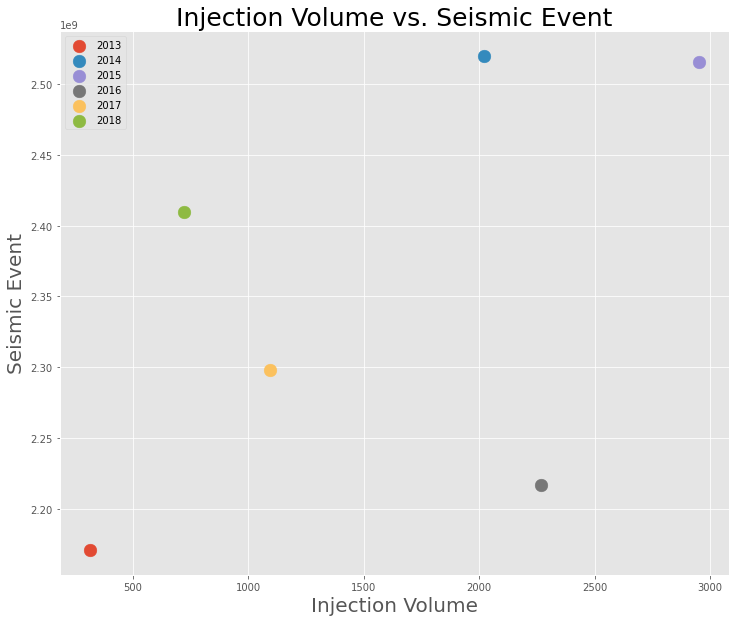

In [59]:
#Scatter plot of Injection Volume vs. Seismic Events
x_values = total_EQ_per_year_df.index
y_values = total_EQ_per_year_df["Total Vol"]
z_values = total_EQ_per_year_df["NumberofEQ"]

plt.title("Injection Volume vs. Seismic Event", fontsize = 25)
plt.gcf().set_size_inches((12, 10))
plt.ylabel("Seismic Event", fontsize = 20)
plt.xlabel("Injection Volume", fontsize = 20)

plt.scatter(z_values.iloc[0], y_values.iloc[0], s=160)
plt.scatter(z_values.iloc[1], y_values.iloc[1], s= 160)
plt.scatter(z_values.iloc[2], y_values.iloc[2], s= 160)
plt.scatter(z_values.iloc[3], y_values.iloc[3], s= 160)
plt.scatter(z_values.iloc[4], y_values.iloc[4], s= 160)
plt.scatter(z_values.iloc[5], y_values.iloc[5], s= 160)
plt.legend(x_values)
plt.savefig("Volumes_vs_EQevent_scatterplot.png", dpi = 300) 
plt.show()